In [1]:
import sys
sys.path.append('../bin/')
from load_data import *
from estimate_covariance import *
from make_figures import *
from classify import *
from utils import *
import matplotlib.pyplot as plt
import time

In [2]:
input_data = 'mnist'
num_classes= 10
DATA_SHAPE = 28*28
num_comp   = [20,50,200,500,DATA_SHAPE]
outpath    = '../outputs/%s/classification/'%input_data
covpath    = '../outputs/%s/covariance_estimator/'%input_data
plotpath   = '../outputs/%s/figures/'%input_data
modes      = ['ML','LW','NERCOME']
pca        = True
masks      = [True,False]

In [3]:
if input_data == 'mnist':
    load_data = load_mnist
if input_data == 'cifar10':
    load_data = load_cifar10

In [4]:
x_train, targets_train, x_test, targets_test, _ = load_data()
print(targets_train.shape, x_train.shape, x_test.shape, targets_test.shape)

(50000,) (50000, 784) (10000, 784) (10000,)


In [5]:
d_v, mv_in, mv_out = prepare_data(data=x_train,labels=targets_train, num_classes=num_classes)
d_t, mt_in, mt_out = prepare_data(data=x_test,labels=targets_test, num_classes=num_classes)

In [6]:
estimate_covariances(d_v,mv_in,mv_out,modes,masks,covpath,pca=False)

../outputs/mnist/covariance_estimator/cov_estimate_ML_0_masked.pkl
../outputs/mnist/covariance_estimator/cov_estimate_ML_1_masked.pkl
../outputs/mnist/covariance_estimator/cov_estimate_ML_2_masked.pkl
../outputs/mnist/covariance_estimator/cov_estimate_ML_3_masked.pkl
../outputs/mnist/covariance_estimator/cov_estimate_ML_4_masked.pkl
../outputs/mnist/covariance_estimator/cov_estimate_ML_5_masked.pkl
../outputs/mnist/covariance_estimator/cov_estimate_ML_6_masked.pkl
../outputs/mnist/covariance_estimator/cov_estimate_ML_7_masked.pkl
../outputs/mnist/covariance_estimator/cov_estimate_ML_8_masked.pkl
../outputs/mnist/covariance_estimator/cov_estimate_ML_9_masked.pkl
../outputs/mnist/covariance_estimator/cov_estimate_ML_0.pkl
../outputs/mnist/covariance_estimator/cov_estimate_ML_1.pkl
../outputs/mnist/covariance_estimator/cov_estimate_ML_2.pkl
../outputs/mnist/covariance_estimator/cov_estimate_ML_3.pkl
../outputs/mnist/covariance_estimator/cov_estimate_ML_4.pkl
../outputs/mnist/covariance_es

True

In [7]:
results = perform_classification(x_test, targets_test, modes,masks, num_classes,num_comp, inpath=covpath, outpath=outpath, pca=pca, tag='test', rerun=False)

ML masked 20
ML masked 50
ML masked 200
ML masked 500
ML masked 784
pca 20
pca 50
pca 200
pca 500
pca 784
ML inpainted 20
ML inpainted 50
ML inpainted 200
ML inpainted 500
ML inpainted 784
pca 50
pca 200
pca 500
pca 784
LW masked 20
LW masked 50
LW masked 200
LW masked 500
LW masked 784
LW inpainted 20
LW inpainted 50
LW inpainted 200
LW inpainted 500
LW inpainted 784
NERCOME masked 20
NERCOME masked 50
NERCOME masked 200
NERCOME masked 500
NERCOME masked 784
NERCOME inpainted 20
NERCOME inpainted 50
NERCOME inpainted 200
NERCOME inpainted 500
NERCOME inpainted 784


../outputs/mnist/figures/MLvsPCA_masked_test.png


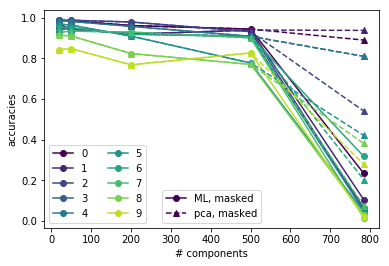

In [15]:
_=make_acc_figure(['ML','pca'],['masked'],results,num_classes,num_comp,plotpath,'MLvsPCA_masked_test.png')

../outputs/mnist/figures/MLvsPCA_inpainted_test.png


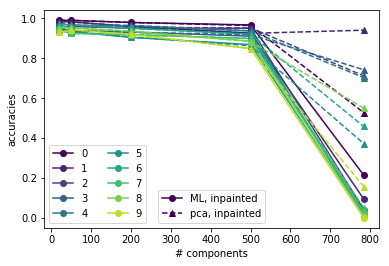

In [16]:
_=make_acc_figure(['ML','pca'],['inpainted'],results,num_classes,num_comp,plotpath,'MLvsPCA_inpainted_test.png')

../outputs/mnist/figures/MLvsLW_masked_test.png


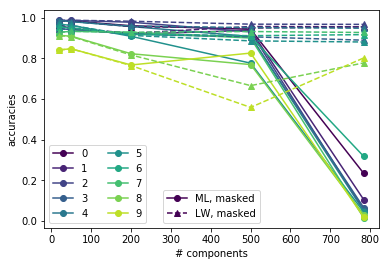

In [17]:
_=make_acc_figure(['ML','LW'],['masked'],results,num_classes,num_comp,plotpath,'MLvsLW_masked_test.png')

../outputs/mnist/figures/MLvsLW_inpainted_test.png


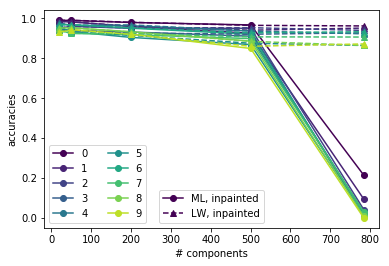

In [18]:
_=make_acc_figure(['ML','LW'],['inpainted'],results,num_classes,num_comp,plotpath,'MLvsLW_inpainted_test.png')

../outputs/mnist/figures/LWvsNERCOME_inpainted_test.png


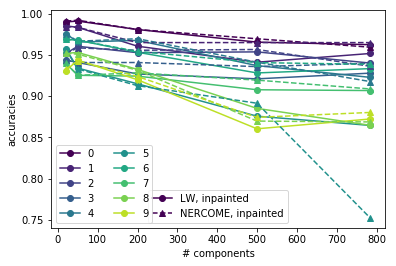

In [19]:
_=make_acc_figure(['LW','NERCOME'],['inpainted'],results,num_classes,num_comp,plotpath,'LWvsNERCOME_inpainted_test.png')

../outputs/mnist/figures/LWvsNERCOME_masked_test.png


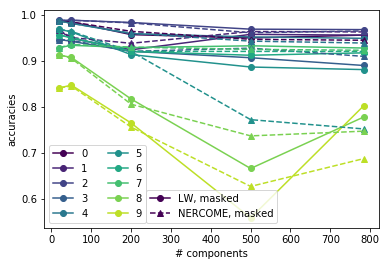

In [20]:
_=make_acc_figure(['LW','NERCOME'],['masked'],results,num_classes,num_comp,plotpath,'LWvsNERCOME_masked_test.png')